<a href="https://colab.research.google.com/github/Ketan-33/PlantDiseaseClassification_AICTE_Cycle4/blob/main/PlantDiseasesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:18<00:00, 157MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import glob as gb

In [19]:
train = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [20]:
len(train)

161

In [21]:
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    validation_split=0.1,
    preprocessing_function=None

).flow_from_directory(
    train,
    target_size=(size, size),
    batch_size=164,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True,
)

Found 63282 images belonging to 38 classes.


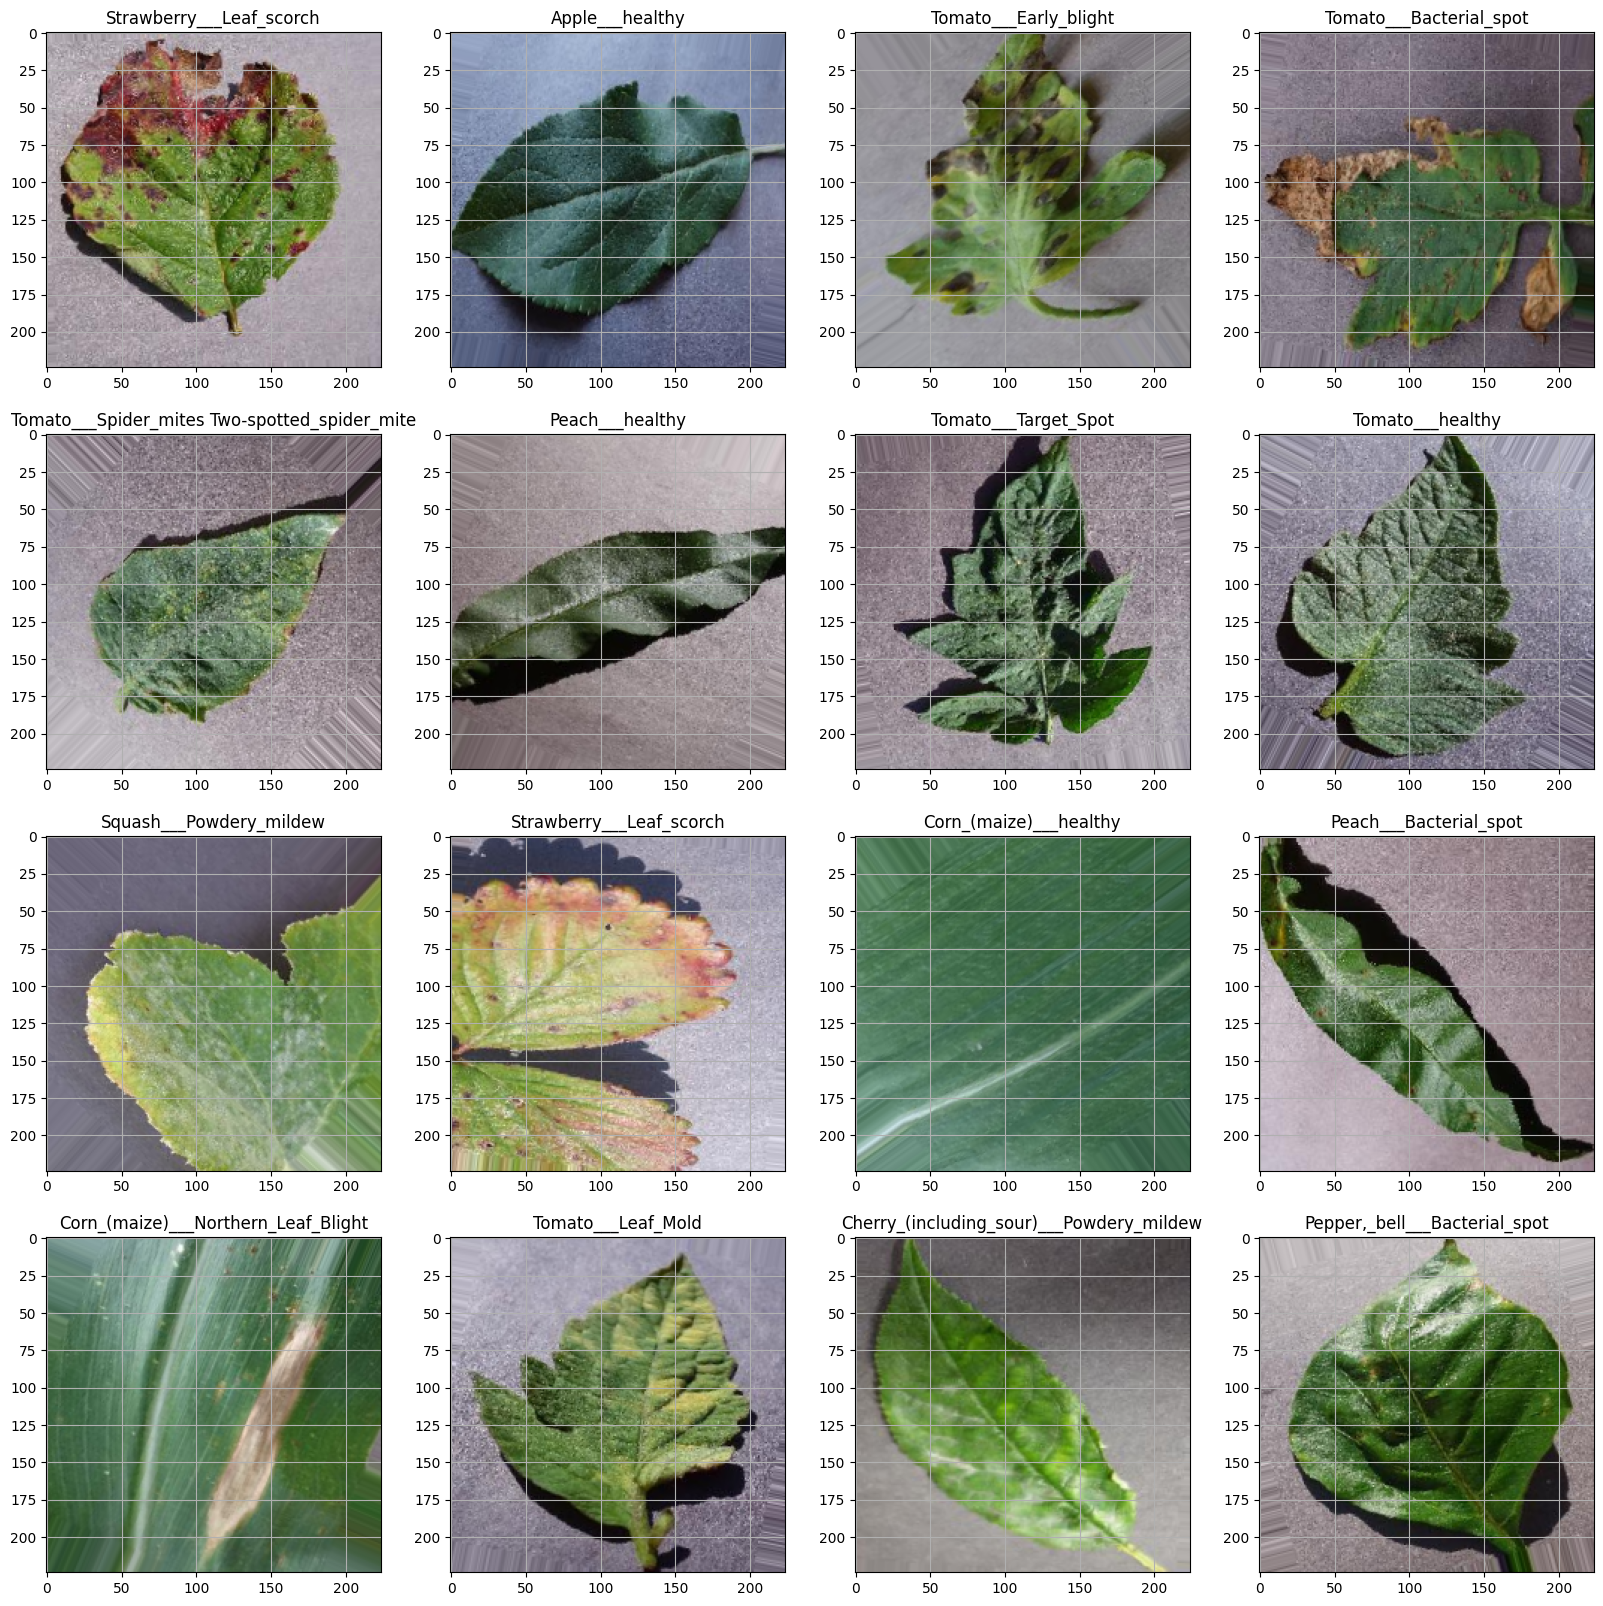

In [26]:
#display some images

classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch,y_batch in train_generator:
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
        plt.grid(None)
    plt.show()
    break

In [27]:
valid = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [28]:
valid_generator= tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    preprocessing_function=None

).flow_from_directory(
    valid,
    target_size=(size, size),
    batch_size=164,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    shuffle=False,
)

Found 1742 images belonging to 38 classes.


In [29]:
test = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [30]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=None

).flow_from_directory(
    test,
    target_size=(size, size),
    batch_size=164,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
)

Found 17572 images belonging to 38 classes.
